<a href="https://colab.research.google.com/github/sagnik-mondal160/Rice-Image-Classifcation/blob/main/Rice_Grain_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0


In [ ]:
!unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [ ]:
!pip install split-folders
import splitfolders
input_folder = "/content/Rice_Image_Dataset"
output = "/content"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 75000 files [00:11, 6726.77 files/s]


(250, 250, 3)

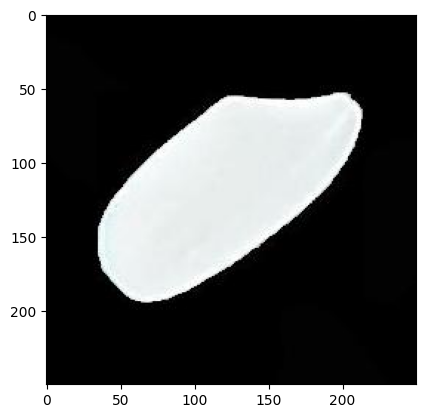

In [ ]:
import cv2
test_img = cv2.imread('/content/train/Ipsala/Ipsala (1000).jpg')
import matplotlib.pyplot as plt
plt.imshow(test_img)
test_img.shape

(64, 64, 3)

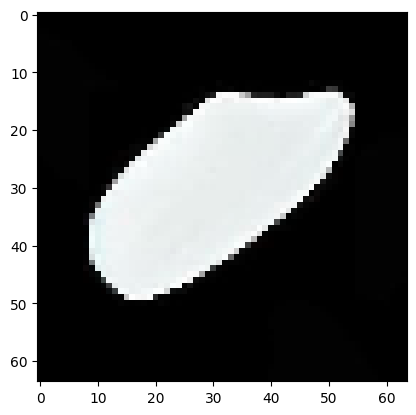

In [ ]:
test_img = cv2.resize(test_img,(64,64))
plt.imshow(test_img)
test_img.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode="categorical",
    batch_size=32,
    image_size=(64,64)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/val',
    labels= 'inferred',
    label_mode="categorical",
    batch_size=32,
    image_size=(64,64)
)

Found 60000 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.


In [ ]:
def process(image, label):
  image= tf.cast(image/255, tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(64, 64, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,781 (2.64 MB)

 Trainable params: 691,781 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
m = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 412s 220ms/step - accuracy: 0.9632 - loss: 0.1070 - val_accuracy: 0.9733 - val_loss: 0.0780
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 400s 213ms/step - accuracy: 0.9793 - loss: 0.0596 - val_accuracy: 0.9811 - val_loss: 0.0579
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 446s 216ms/step - accuracy: 0.9873 - loss: 0.0369 - val_accuracy: 0.9919 - val_loss: 0.0236
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 397s 212ms/step - accuracy: 0.9919 - loss: 0.0226 - val_accuracy: 0.9921 - val_loss: 0.0245
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 390s 208ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9958 - val_loss: 0.0120
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 409s 218ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9972 - val_loss: 0.0095
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 422s 208ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9867 - val_loss: 0.0410
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 400s 213ms/step - ac

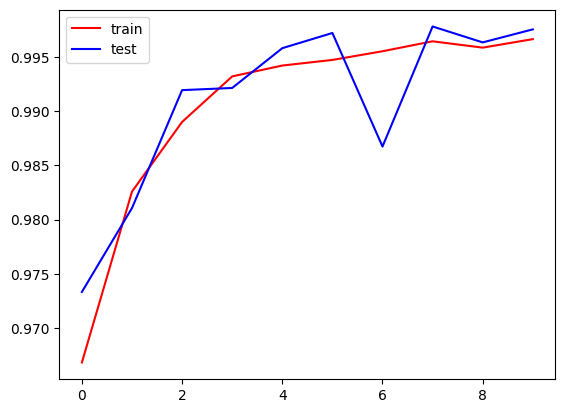

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m.history['accuracy'], color='red', label='train')
plt.plot(m.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

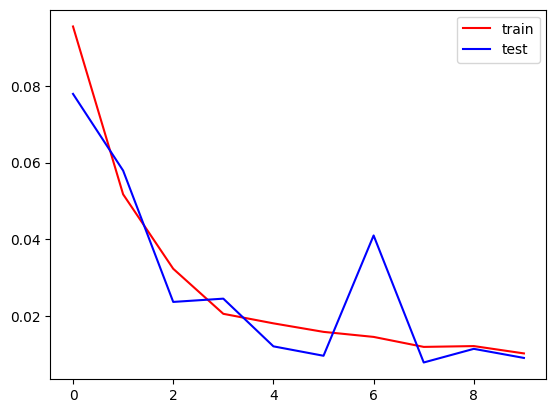

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m.history['loss'], color='red', label='train')
plt.plot(m.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import  img_to_array, array_to_img, load_img

def testImage(img):
  test_image = load_img(img, target_size = (64, 64))
  test_image = img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  for element in result:
    result_predicted = np.argmax(element)
  if result_predicted == 0:
    print('Arborio')
  elif result_predicted == 1:
    print('Basmati')
  elif result_predicted == 2:
    print('Ipsala')
  elif result_predicted == 3:
    print('Jasmine')
  else:
    print('Karacadag')

In [ ]:
testImage('/content/val/Jasmine/Jasmine (10242).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Jasmine


In [ ]:
testImage('/content/val/Jasmine/Jasmine (10466).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Basmati


In [ ]:
testImage('/content/val/Ipsala/Ipsala (112).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Ipsala


In [ ]:
testImage('/content/val/Karacadag/Karacadag (10134).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Karacadag


In [ ]:
testImage('/content/val/Basmati/basmati (1213).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Basmati
